Decision Tree Algorithm belongs to the family of Supervised algorithms.It can be used for solving regression and classification problems too.The goal of using decision tree algorithm is to creat a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data.


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load datasets
df=pd.read_csv('iris3.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


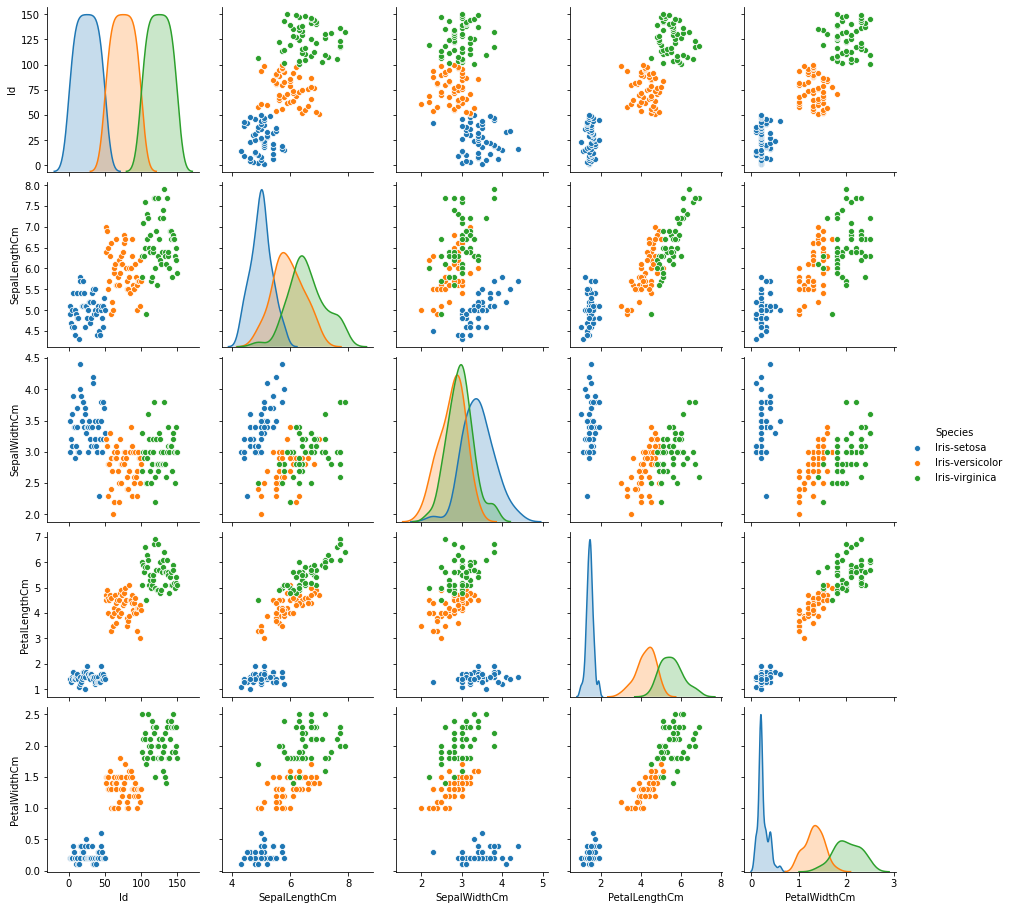

In [7]:
import seaborn as sns
sns.pairplot(df,hue='Species') 

In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


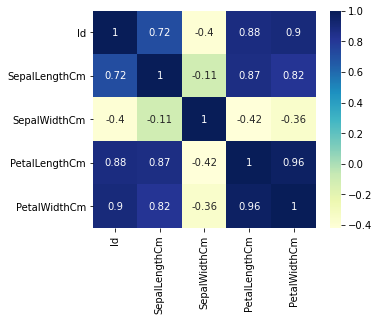

In [11]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'YlGnBu') 

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [13]:
df['Species'] = le.fit_transform(df['Species'])
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


0 : Iris-Setosa

1 : Iris-Versicolor

2 : Iris-Verginica

In [14]:
y=df.Species
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


In [15]:
x=df.drop(columns=['Species','Id'])

### Training the Model

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)#train 80% and test 20% of the data
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [19]:
y_train.head()

91     1
135    2
69     1
128    2
114    2
Name: Species, dtype: int32

In [20]:
#defining Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [21]:
y_pred = dtree.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [29]:
text_representation=tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## Visualization

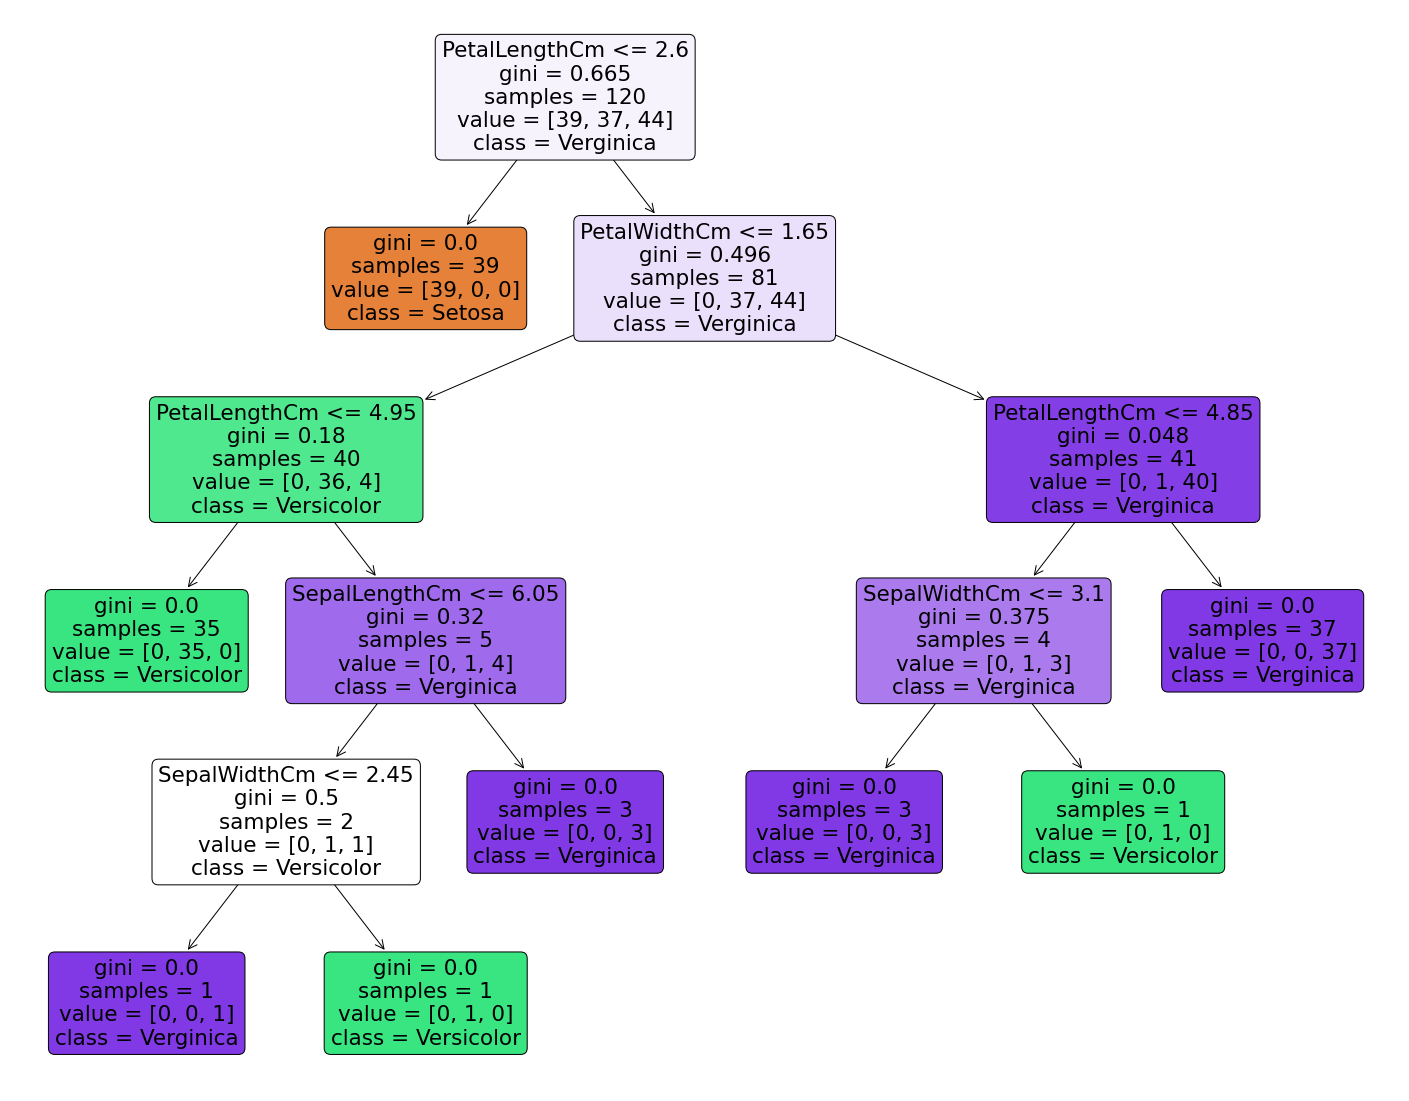

In [46]:
from sklearn import tree
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Setosa','Versicolor','Verginica']

fig=plt.figure(figsize=(25,20))
tree.plot_tree(dtree,feature_names=fn,class_names=cn,filled=True,rounded=True)
fig.savefig('irisdtree.png')

In [42]:
print("Accuracy: ",dtree.score(x_train, y_train) * 100)

Accuracy:  100.0


In [43]:
print("Accuracy: ",dtree.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


In [44]:
# this feature taken from data target 1
e=dtree.predict([[5.5,2.1,4.0,1.1]])
e  

array([1])